### 2018년 ~ 2020년도 시계열 분석

In [13]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
%matplotlib inline 
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령


In [14]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [76]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [77]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  1096 non-null   object
 1   CNT          1096 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [11]:
all.head()

,ACCOUNTDATE,CNT
0,2018-01-01,205
1,2018-01-02,931
2,2018-01-03,778
3,2018-01-04,765
4,2018-01-05,863


In [10]:
all.CNT.mean()

746.9726277372263

In [78]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [7]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [79]:
train.columns=['ds','y']
test.columns=['ds','y']

In [80]:
train['ds']= pd.to_datetime(train['ds'])

In [81]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 305 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      61 non-null     object
 1   y       61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


- test개수 만큼을 예축해야 하므로 61개를 예측하고자 합니다.

In [82]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(61)

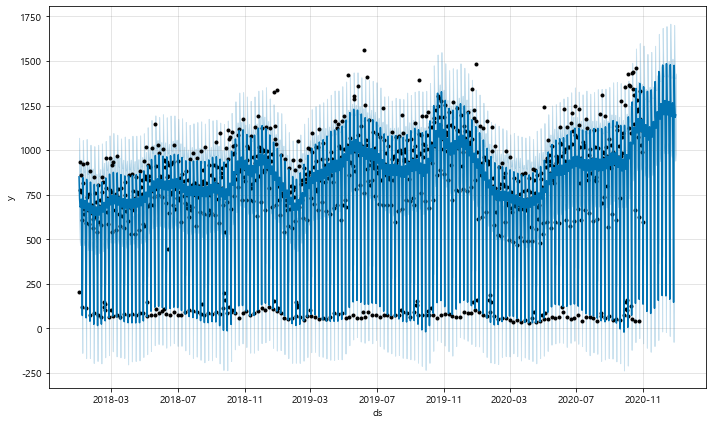

In [13]:
fig1=prophet.plot(forecast_data)

### test데이터 개수가 61개이기 때문에 61개만 뽑은 것

In [83]:
pred_y=a.yhat.values[0:61]
test_y=test.y.values[0:61]

In [15]:
pred_y

array([ 136.40291299, 1355.34693672, 1153.07924137, 1078.28905614,
       1086.09795349, 1142.47137069,  819.30818591,   95.86741286,
       1329.98407636, 1128.40823567, 1056.49315679, 1068.77837836,
       1130.75382031,  809.61220145,   84.28515871, 1337.68633277,
       1140.14552112, 1073.62747936, 1092.05588975, 1160.43045457,
        841.24210211,  113.11803593, 1384.09111371, 1188.12782078,
       1123.87603726, 1144.72793903, 1215.28785161,  893.4478255 ,
        157.63906323, 1441.12497116, 1241.62032907, 1174.5654586 ,
       1192.92561241, 1261.00732099,  932.1922969 ,  184.79347065,
       1477.37025331, 1271.43777532, 1199.2666825 , 1213.41860255,
       1277.91093677,  941.6093989 ,  182.68930164, 1484.97398263,
       1273.73534277, 1198.0207397 , 1209.92619712, 1273.11145547,
        931.85305856,  164.11285227, 1478.90153394, 1265.17239985,
       1188.67714995, 1200.97851578, 1265.31707123,  921.3261618 ,
        146.7086792 , 1475.62654826, 1260.68823691, 1184.33376

## 2020년 11월1일부터 12월31일예측

(0.0, 1600.0)

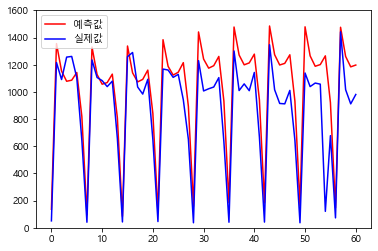

In [84]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()
plt.ylim([0, 1600])

- 중간에 급격하게 내려가는 값들은 공휴일이나 크리스마스가 껴있어 예측의 성능이 좋지 않습니다.

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

169.56742683913052

In [12]:
#이걸로 보여드리기(퍼센트로)
169/756

0.22354497354497355

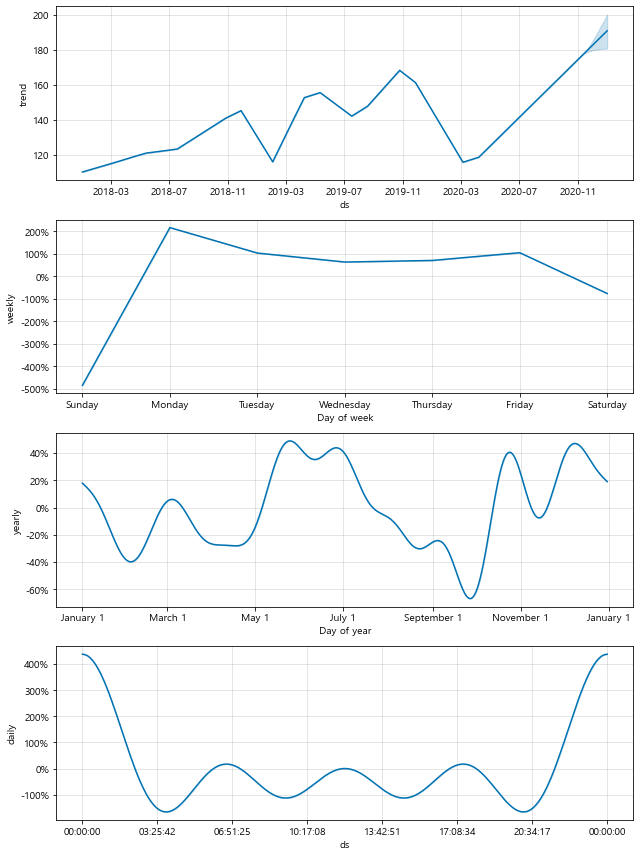

In [18]:
fig2=prophet.plot_components(forecast_data)

# 일요일 제거 한 후

In [112]:
number1 = int(input("해당 숫자의 배수를 구하기 : "))
# 예를들어 3의 배수를 1부터 ~ 999까지 뽑아낸다고 가정합니다.


set1 = [] # number1에서 3의 배수를 추출한 리스트를 저장하는 곳
for i in range(1,365):
    if (i) % number1 == 0:
        set1.append(i+741)

        

print(set1)


해당 숫자의 배수를 구하기 : 7
[748, 755, 762, 769, 776, 783, 790, 797, 804, 811, 818, 825, 832, 839, 846, 853, 860, 867, 874, 881, 888, 895, 902, 909, 916, 923, 930, 937, 944, 951, 958, 965, 972, 979, 986, 993, 1000, 1007, 1014, 1021, 1028, 1035, 1042, 1049, 1056, 1063, 1070, 1077, 1084, 1091, 1098, 1105]


In [62]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [63]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,
                    76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                    146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                    251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])

In [64]:
hospital_2019=hospital_2019.drop([5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362])

In [65]:
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [66]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [22]:
all.CNT.mean()

858.9797872340425

In [5]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  1096 non-null   object
 1   CNT          1096 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [67]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [68]:
train.columns=['ds','y']
test.columns=['ds','y']

In [69]:
train['ds']= pd.to_datetime(train['ds'])

In [55]:
from fbprophet import Prophet

In [70]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

In [71]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(60)

### 예측을 주말도 함께 한거라 60일 중 8개의 일요일을 제거하는 작업

In [14]:
a=a.drop([1042, 1049, 1056, 1063, 1070, 1077, 1084, 1091]) #예측한 60개에 데이터에는 일요일이 포함되어 있어 제거하는 작업
#923, 930, 937, 944

In [17]:
test=test.drop([312, 319, 326, 333, 340, 347, 354, 361])

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 305 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      53 non-null     object
 1   y       53 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [72]:
pred_y=a.yhat.values[0:52]
test_y=test.y.values[1:53]

## 2020년 11월1일부터 12월31일예측 (일요일 제거한 것)

(0.0, 1600.0)

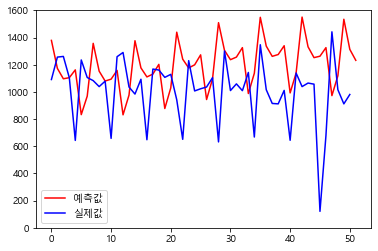

In [75]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()
plt.ylim([0, 1600])
#크리스마스라는 공휴일때문에 예측의 정확성이 내려간 것으로 보임

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

182.48069518659838

In [23]:
182/858

0.21212121212121213

- 실제값 오른쪽에 내려가는 값은 크리스마스 때문에 

## 일요일 제거한 후 토요일 조정한 것

- 아래는 토요일 일요일 전체 다 제거한 것

In [85]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [25]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,
                    76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                    146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                    251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363,5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362])

In [26]:
hospital_2019=hospital_2019.drop([5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362,4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [27]:
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361,3, 10, 17, 24, 31, 38, 45, 52,
                                  59, 66, 73, 80, 87, 94, 101, 108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192, 199, 206, 213, 220, 227,
                                  234, 241, 248, 255, 262, 269, 276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360])

In [86]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,76, 83, 90, 97, 104, 111, 118, 125, 132, 139,146,
                                  153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                                  251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])
hospital_2019=hospital_2019.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                                  146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                                  251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                                  102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                                  249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [87]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [88]:
all.mean() #토,일 제외한 값들의 평균

CNT    802.02766
dtype: float64

In [154]:
all.mean() #일요일만 제거한 값들의 평균

CNT    858.979787
dtype: float64

In [89]:
hospital_2018['index1'] = hospital_2018.index
hospital_2019['index1'] = hospital_2019.index
hospital_2020['index1'] = hospital_2020.index

In [90]:
prod_list =  [5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,82, 89, 96, 103, 110, 117,
              124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215,
              222, 229, 236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362]
hospital_2018.loc[hospital_2018['index1'].isin(prod_list), 'CNT'] *= 1.411

In [91]:
prod_list =  [4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
              102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
              249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361]
hospital_2019.loc[hospital_2019['index1'].isin(prod_list), 'CNT'] *= 1.411

In [92]:
prod_list =  [3, 10, 17, 24, 31, 38, 45, 52,59, 66, 73, 80, 87, 94, 101,
              108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192, 199, 206, 213, 220, 227,
              234, 241, 248, 255, 262, 269, 276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360]
hospital_2020.loc[hospital_2020['index1'].isin(prod_list), 'CNT'] *= 1.411

In [93]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [49]:
all.mean()

CNT       845.564365
index1    181.890426
dtype: float64

In [94]:
all=all.loc[:,['ACCOUNTDATE','CNT']].copy()

In [95]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [96]:
train.columns=['ds','y']
test.columns=['ds','y']

In [97]:
train['ds']= pd.to_datetime(train['ds'])

In [98]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

In [99]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(60)

In [100]:
test=test.drop([359])

In [101]:
a=a.drop([942])

In [102]:
a=a.drop([895, 902, 909, 916, 923, 930, 937, 944])

In [103]:
pred_y=a.yhat.values[0:51]
test_y=test.y.values[0:51]

(0.0, 1600.0)

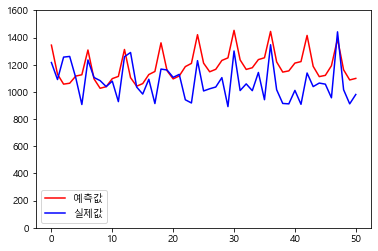

In [107]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()
plt.ylim([0,1600])

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)

141.91767883218253

In [38]:
151/845

0.178698224852071

## 크리스마스를 제거한 것

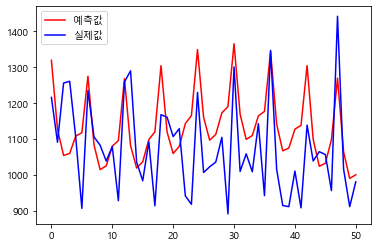

In [79]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)

102.78365832105948

In [109]:
# 위 3가지 경우, 비교> 토요일,일요일 제거
#mae월~금 / 퍼센트 만들어 주기

In [ ]:
#다중시계열 해보기(코드)